# Multi-classifiers with Solar Power Ramp Events

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os


## Importing the dataset

In [2]:
os.getcwd()
os.chdir('../datasets')
# dataset = pd.read_csv('Social_Network_Ads.csv')
dataset = pd.read_csv('rampdata66.csv')
# X = dataset.iloc[:, [2, 3]].values
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 66].values
# X = dataset.iloc[:, :-1]
# y = dataset.iloc[:, 66]
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V58,V59,V60,V61,V62,V63,V64,V65,V66,Class
0,0.001610,0.001852,0.445164,0.710982,0.482693,0.346400,0.786719,0.296912,0.212884,0.414958,...,4,2,2,2,2,2,1,2,2,4
1,0.127630,0.085961,0.548310,0.907729,0.999993,0.607910,0.184483,0.370349,0.051022,0.696017,...,2,2,2,2,2,4,4,2,2,2
2,0.034725,0.109288,0.510308,0.922363,0.999993,0.598586,0.159467,0.365388,0.054600,0.720091,...,2,2,2,2,2,2,2,2,2,2
3,0.033372,0.276992,0.473963,0.927030,0.999993,0.604930,0.140143,0.369037,0.092530,0.730662,...,4,4,4,2,2,2,2,2,4,4
4,0.171606,0.153857,0.456074,0.928770,0.999993,0.595534,0.121081,0.371288,0.086637,0.736614,...,2,4,4,2,2,2,2,4,4,4


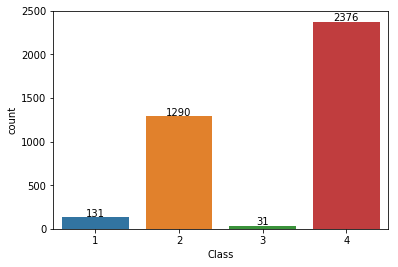

In [3]:
ramps_plot=sns.countplot(dataset['Class'],label="Count")
for p in ramps_plot.patches:
    ramps_plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 4),
                        textcoords = 'offset points')

### Choose Some Features from the Input Features

In [4]:
# a=[7,8,21,22,40,41,57,58]
# a=[7,8,9,21,22,23,40,41,42,57,58,59]
# a=[7,8,9,21,22,23,33,34,35,40,41,42,50,51,52,57,58,59]
# a=[6,7,8,9,20,21,22,23,32,33,34,35,39,40,41,42,49,50,51,52,56,57,58,59]
# a=[6,7,8,9,20,21,22,23,27,29,32,33,34,35,39,40,41,42,46,48,49,50,51,52,56,57,58,59,63,66]

a=[20,21,22,23,27,29,33,34,35,39,40,41,42,46,48,49,56,57,58,59,63,65,66]

# a=n=np.arange(50,66)
# a=n=np.arange(55,66)

# n=np.arange(0,66)
n=66
xn = set(range(n)) - set(a)
print('a=',a)
print('xn=',xn)

xf=np.delete(X,np.s_[a], axis=1)

xf.shape

a= [20, 21, 22, 23, 27, 29, 33, 34, 35, 39, 40, 41, 42, 46, 48, 49, 56, 57, 58, 59, 63, 65, 66]
xn= {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 24, 25, 26, 28, 30, 31, 32, 36, 37, 38, 43, 44, 45, 47, 50, 51, 52, 53, 54, 55, 60, 61, 62, 64}


C:\Users\Mhdella\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


(3828, 44)

In [5]:
X=xf

### Fitting the model

In [6]:
from sklearn import metrics   ##Additional scklearn functions
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

params={'max_depth': 12, 'min_samples_split': 100, 'n_estimators': 300}
classifier = RandomForestClassifier(**params, criterion = 'entropy', random_state=0, class_weight='balanced')    

### Cross-validation for the model: 

https://stats.stackexchange.com/questions/183984/how-to-use-xgboost-cv-with-hyperparameters-optimization

In [7]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score
# import xgboost as xgb

# dtrain = xgb.DMatrix(data=X, label=y)
# dtest = xgb.DMatrix(data=X)
# # scale_pos_weight=[7.30534351,  0.74186047, 30.87096774,  0.40277778]
class_weight=[7.30534351,  0.74186047, 30.87096774,  0.40277778]

# params = {'n_estimators':300,
#               'learning_rate': 0.015,
#               'subsample':0.53,
#               'max_depth':5,
#               'colsample_bytree': 1,
#               'min_child_weight': 2,
#               'scale_pos_weight':class_weight,
#               'objective': 'multi:softmax',  # error evaluation for multiclass training
#               'num_class': 5,
#               'n_gpus': 0,
#               'random_state':0,
#               'class_weight':class_weight,
#          }

# params = {
#     'max_depth': 12,
#     'objective': 'multi:softmax',  # error evaluation for multiclass training
#     'num_class': 5,
#     'n_gpus': 0
# }

numFolds = 2
folds = KFold(n_splits = numFolds, shuffle = True)

results = np.zeros(len(X))
score = 0.0

for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
#     dtrain = xgb.DMatrix(data=X_train, label=y_train)
#     dtest = xgb.DMatrix(data=X_test)
    
    classifier = classifier.fit(X_train, y_train)
    results[test_index] = classifier.predict(X_test)
    score += f1_score(y_test, results[test_index], average=None)

score /= numFolds

In [8]:
print(len(train_index), len(test_index))

X[test_index,:].shape
y[train_index]
score

1914 1914


array([0.5300813 , 0.78037156, 0.2937358 , 0.90715835])

In [9]:
from sklearn.metrics import classification_report

# print(classification_report(y, y_pred))
print(classification_report(y, results))

              precision    recall  f1-score   support

           1       0.40      0.78      0.53       131
           2       0.79      0.77      0.78      1290
           3       0.17      0.48      0.25        31
           4       0.94      0.88      0.91      2376

   micro avg       0.84      0.84      0.84      3828
   macro avg       0.58      0.73      0.62      3828
weighted avg       0.86      0.84      0.85      3828



## Making the Confusion Matrix
#### We can use this value to calculate the new performance measure with this subset of the features.

In [10]:
from sklearn.model_selection import cross_val_predict
# y_pred = cross_val_predict(classifier, X, y, cv=2)
# y_pred = cross_val_predict(classifier, X[:,result[0]['columns']], y, cv=2)

# y_pred = cross_val_predict(classifier, X, y, cv=2)

# y_pred = cross_val_predict(classifier, X[:,result[N_search-1]['columns']], y, cv=2)
# y_pred = cross_val_predict(classifier, X[:,result[N_search-(N_search-1)]['columns']], y, cv=2)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(results, y)
cm

array([[ 102,  146,    0,    6],
       [  29,  993,    4,  227],
       [   0,   20,   15,   52],
       [   0,  131,   12, 2091]], dtype=int64)

In [11]:
print('True Hi_Ramps=',cm[0,0]+cm[2,2])
print('False Hi_Ramps=',cm[1,0]+cm[2,0]+cm[3,0]+cm[0,2]+cm[1,2]+cm[3,2])

True Hi_Ramps= 117
False Hi_Ramps= 45


In [12]:
from sklearn.metrics import f1_score
f1_score(y, results, average=None)

array([0.52987013, 0.78096736, 0.25423729, 0.90715835])

In [13]:
y.shape
len(y)
print('C1=', len(y[y==1]),'C2=', len(y[y==2]),
      'C3=', len(y[y==3]),'C4=', len(y[y==4]))

C1= 131 C2= 1290 C3= 31 C4= 2376


In [14]:
 #Create a function within many Machine Learning Models
def models(X_train,y_train):
  
  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, y_train)
    
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
#   log =LogisticRegression(C=10, class_weight='balanced', dual=False, fit_intercept=True, 
#                   intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#                   penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
#                   verbose=0, warm_start=False)

  log.fit(X_train, y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0, probability=True)
  svc_lin.fit(X_train, y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0, probability=True)
  svc_rbf.fit(X_train, y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#   tree = DecisionTreeClassifier(max_depth=12, min_samples_split=100,
#                                 criterion = 'entropy', random_state = 0)

  tree.fit(X_train, y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
#   forest = RandomForestClassifier(max_depth=12, n_estimators = 300, min_samples_split=100,
#                                   criterion = 'entropy', random_state = 0)

  forest.fit(X_train, y_train)
    
  #Using Extreme Gradient Boosting Classification algorithm
  #Using Extreme Gradient Boosting Classification algorithm
  from xgboost import XGBClassifier
  class_weight=[7.30534351,  0.74186047, 30.87096774,  0.40277778] 
  XGB = XGBClassifier(objective= 'multi:softmax', num_class=5, n_gpus=0,
                                    scale_pos_weight=class_weight,class_weight=class_weight)
  params = {'max_depth': 12,
            'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500,
            'objective': 'multi:softmax',  # error evaluation for multiclass training
            'num_class': 5,'n_gpus': 0,}

  XGB.fit(X_train, y_train)

  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  print('[7]Extreme Gradient Boosting Classifier Training Accuracy:', XGB.score(X_train, y_train))

  
  return gauss, log, knn, svc_lin, svc_rbf, tree, forest, XGB
model_name=['NBayes', 'LogReg', 'kNN', 'SVM_lin', 'SVM_rbf', 'DT', 'RF', 'XGB']

In [15]:
model = models(X_train,y_train)

C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0]Logistic Regression Training Accuracy: 0.874085684430512
[1]K Nearest Neighbor Training Accuracy: 0.8824451410658307
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8850574712643678
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8625914315569488
[4]Gaussian Naive Bayes Training Accuracy: 0.6452455590386625
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9905956112852664
[7]Extreme Gradient Boosting Classifier Training Accuracy: 0.9524555903866249


In [16]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(model_name[i],  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[ 64   8   0   0]
 [265 267  54  60]
 [  0   1  14   0]
 [ 24 108 192 857]]
Model[NBayes] Testing Accuracy = "0.5480132450331126!"

[[   0   72    0    0]
 [   0  524    0  122]
 [   0    1    0   14]
 [   0   98    0 1083]]
Model[LogReg] Testing Accuracy = "0.8791946308724832!"

[[  29   43    0    0]
 [  26  502    0  118]
 [   0    0    1   14]
 [   3  111    8 1059]]
Model[kNN] Testing Accuracy = "0.885!"

[[  31   41    0    0]
 [  15  521    0  110]
 [   0    0    0   15]
 [   1   99    0 1081]]
Model[SVM_lin] Testing Accuracy = "0.9078947368421053!"

[[   0   72    0    0]
 [   0  560    0   86]
 [   0    0    0   15]
 [   0  138    0 1043]]
Model[SVM_rbf] Testing Accuracy = "0.8860759493670886!"

[[  28   42    0    2]
 [  36  459    6  145]
 [   0    3    5    7]
 [   5  137   16 1023]]
Model[DT] Testing Accuracy = "0.8619469026548673!"

[[  30   42    0    0]
 [  19  519    0  108]
 [   0    0    2   13]
 [   2  123    0 1056]]
Model[RF] Testing Accuracy = "0.9!"

[[  30   4

In [17]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',model_name[i])
  #Check precision, recall, f1-score
  print( classification_report(y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print(accuracy_score(y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  NBayes
              precision    recall  f1-score   support

           1       0.18      0.89      0.30        72
           2       0.70      0.41      0.52       646
           3       0.05      0.93      0.10        15
           4       0.93      0.73      0.82      1181

   micro avg       0.63      0.63      0.63      1914
   macro avg       0.47      0.74      0.43      1914
weighted avg       0.82      0.63      0.69      1914

0.6280041797283177

Model  LogReg
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        72
           2       0.75      0.81      0.78       646
           3       0.00      0.00      0.00        15
           4       0.89      0.92      0.90      1181

   micro avg       0.84      0.84      0.84      1914
   macro avg       0.41      0.43      0.42      1914
weighted avg       0.80      0.84      0.82      1914

0.8396029258098223

Model  kNN


C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.50      0.40      0.45        72
           2       0.77      0.78      0.77       646
           3       0.11      0.07      0.08        15
           4       0.89      0.90      0.89      1181

   micro avg       0.83      0.83      0.83      1914
   macro avg       0.57      0.54      0.55      1914
weighted avg       0.83      0.83      0.83      1914

0.8312434691745036

Model  SVM_lin
              precision    recall  f1-score   support

           1       0.66      0.43      0.52        72
           2       0.79      0.81      0.80       646
           3       0.00      0.00      0.00        15
           4       0.90      0.92      0.91      1181

   micro avg       0.85      0.85      0.85      1914
   macro avg       0.59      0.54      0.56      1914
weighted avg       0.84      0.85      0.85      1914



C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

0.8531870428422152

Model  SVM_rbf
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        72
           2       0.73      0.87      0.79       646
           3       0.00      0.00      0.00        15
           4       0.91      0.88      0.90      1181

   micro avg       0.84      0.84      0.84      1914
   macro avg       0.41      0.44      0.42      1914
weighted avg       0.81      0.84      0.82      1914

0.8375130616509927

Model  DT
              precision    recall  f1-score   support

           1       0.41      0.39      0.40        72
           2       0.72      0.71      0.71       646
           3       0.19      0.33      0.24        15
           4       0.87      0.87      0.87      1181

   micro avg       0.79      0.79      0.79      1914
   macro avg       0.54      0.57      0.55      1914
weighted avg       0.79      0.79      0.79      1914

0.7915360501567398

Model  RF
              precision    recall  

<Figure size 432x288 with 0 Axes>

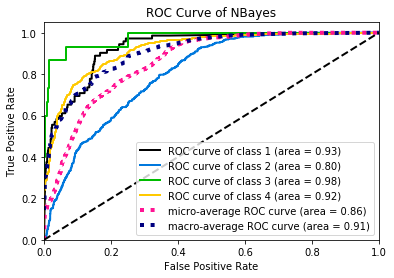

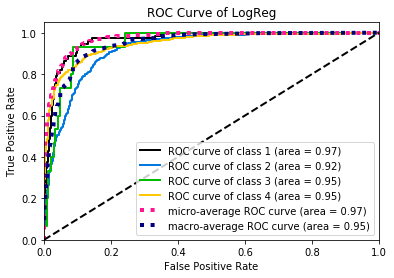

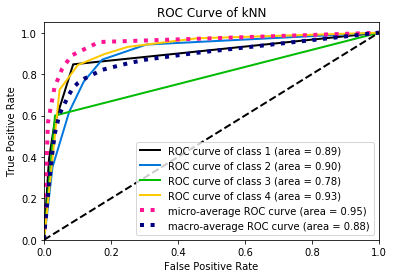

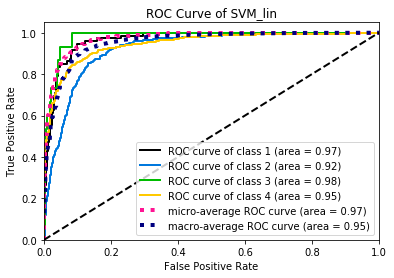

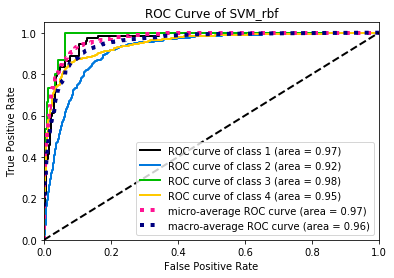

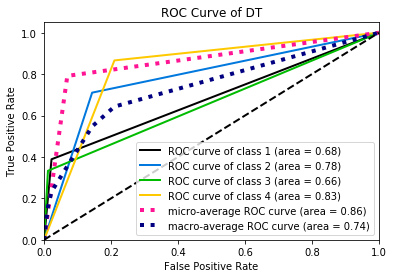

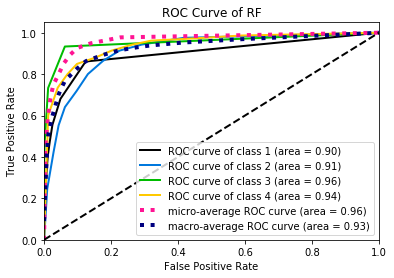

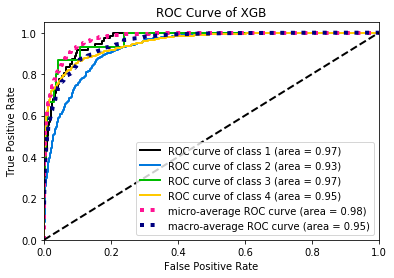

In [18]:
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import scikitplot as skplt
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
fig = plt.figure()
num=0
for i in range(len(model)):
    num+=1
    predicted_probas = model[i].predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, predicted_probas, plot_micro=True, plot_macro=True, classes_to_plot=None)
    plt.title('ROC Curve of '+model_name[i])
plt.show()

### Convert the classificationreport to dataframe for more analysis and visulization

In [19]:
y_pred=model[0].predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.head(7)

,f1-score,precision,recall,support
1,0.301176,0.181303,0.888889,72.0
2,0.518447,0.695312,0.413313,646.0
3,0.101818,0.053846,0.933333,15.0
4,0.816969,0.934569,0.725656,1181.0
micro avg,0.628004,0.628004,0.628004,1914.0
macro avg,0.434602,0.466258,0.740298,1914.0
weighted avg,0.691206,0.818579,0.628004,1914.0


In [20]:
# df_report['f1-score']['micro avg']
# df_report['f1-score']['macro avg']
df_report['f1-score']['weighted avg']

0.6912060245233956

In [21]:
df_micro=np.zeros((len(model),3))
df_macro=np.zeros((len(model),3))
df_weigh=np.zeros((len(model),3))

for i in range(len(model)):
    y_pred=model[i].predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_avg=df_report.iloc[[4,5,6],[0,1,2]]
    df_micro[i,:]=df_avg.iloc[[0],0:].values
    df_macro[i,:]=df_avg.iloc[[1],0:].values
    df_weigh[i,:]=df_avg.iloc[[2],0:].values

C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mhdella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

In [22]:
dfs=[df_micro, df_macro, df_weigh]
pds=['pd_micro', 'pd_macro', 'pd_weigh']
avg_names=['Micro', 'Macro', 'Weighted']

for j in range(len(pds)):
    pds[j] = pd.DataFrame({'f1-score': dfs[j][:, 0], 'precision': dfs[j][:, 1], 'recall': dfs[j][:, 2]})
    pds[j].index=model_name

### Plot the average metrics with all classes for all models

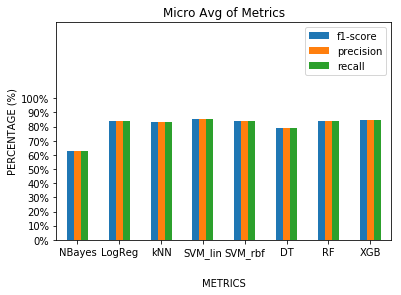

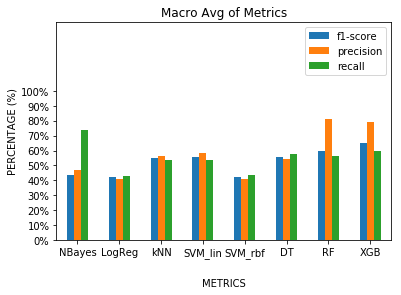

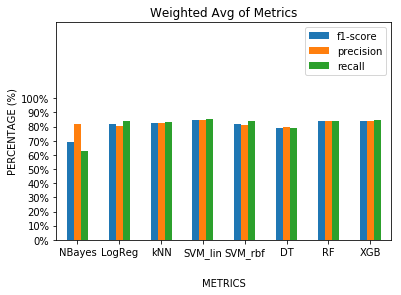

In [23]:
for i in range(3):
    # # plot the classification report scores 
    pds[i].iloc[:, :3].plot.bar()
    plt.title(avg_names[i]+' Avg of Metrics')
    plt.xlabel('METRICS', labelpad=20)
    plt.xticks(rotation=0)
    percent_ticks = np.linspace(0,1,11, endpoint=True)
    percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
    ## plt.yticks(ticks=percent_ticks, labels=percent_labels)
    plt.yticks(percent_ticks, percent_labels)
    plt.ylabel('PERCENTAGE (%)')
    plt.margins(0.7,0.8)
    plt.show(fig)